#### Here in this ipynb file we will check for the Female related Queries that tell us the various insights of the Female Data Set


In [1]:
#  import the CSV file Female.csv
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Female_csv.csv')

In [2]:
"""Here we will find which product is most consumed by the all females in the given data set"""

Product_data_of_Female=df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=True)
print(Product_data_of_Female)

Product Category
Beauty         418
Electronics    439
Clothing       441
Name: Quantity, dtype: int64


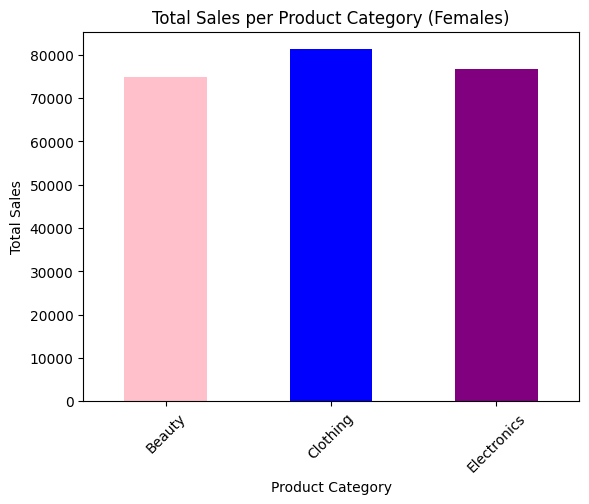

In [3]:
"""Visualzation of total Amount sale of all the product and representation in the form of
the Bar Graph """

per_category_sales = df.groupby('Product Category')['Total Amount'].sum()
per_category_sales.plot(kind='bar', color=['pink', 'blue', 'purple'])
plt.title('Total Sales per Product Category (Females)')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


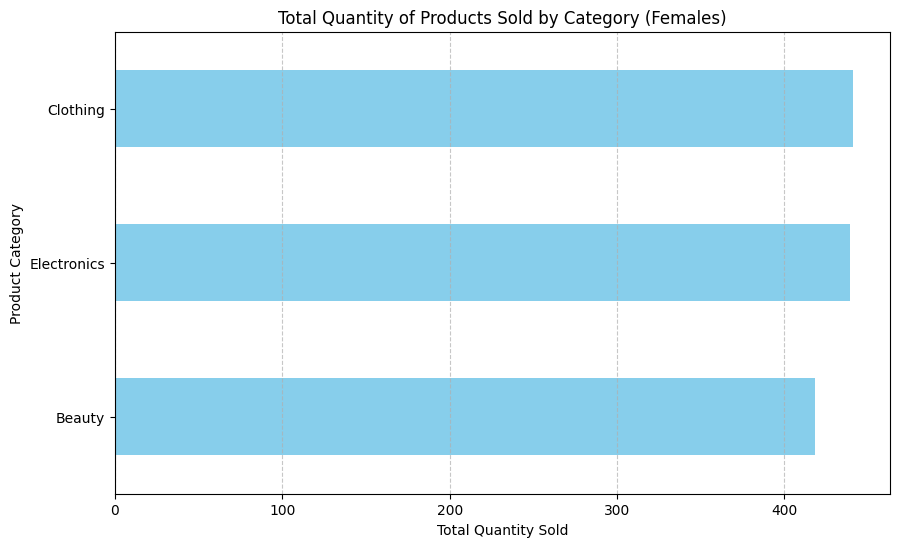

In [4]:
#Creation of the Graph to show the Product Category 

Product_data_of_Female.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Category")
plt.title("Total Quantity of Products Sold by Category (Females)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [5]:
"""
Here we will make three different age groups which deals with the product consumptions and tell
how much the count each age group will hold in it
"""

# Creating DataFrames for different age groups
young_age_people_female = df[(df['Age'] >= 0) & (df['Age'] <= 25)]
middle_age_people_female = df[(df['Age'] > 25) & (df['Age'] <= 50)]
older_age_people_female = df[(df['Age'] > 50) & (df['Age'] <= 100)]

print('Which age Group contributes in the growth of the Sales the Most in Number of Buyers')
print(f'Total No of the Female that fall under the younger age group are: {len(young_age_people_female)}')
print(f'Total No of the Female that fall under the middle age group are: {len(middle_age_people_female)}')
print(f'Total No of the Female that fall under the older age group are: {len(older_age_people_female)}')

Which age Group contributes in the growth of the Sales the Most in Number of Buyers
Total No of the Female that fall under the younger age group are: 81
Total No of the Female that fall under the middle age group are: 271
Total No of the Female that fall under the older age group are: 158


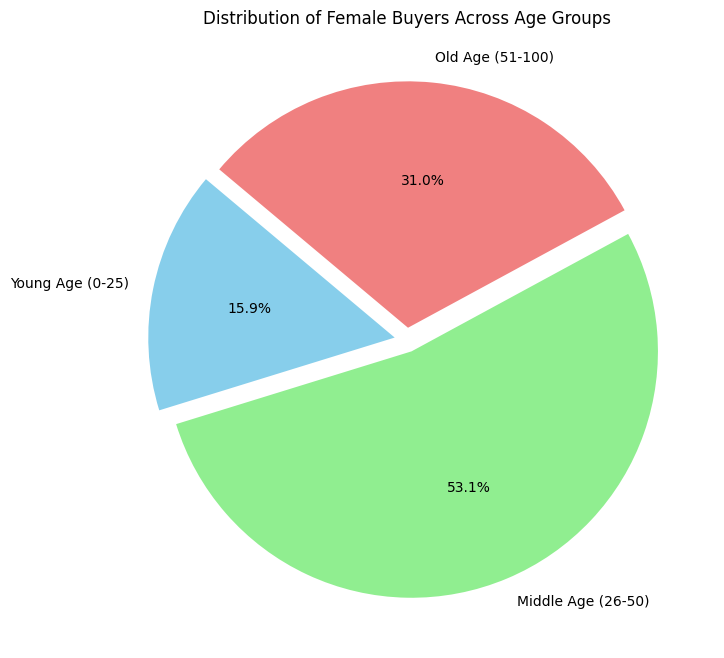

In [6]:
#Creation of the Graph to show the Group Contribution of the various age group  

# Data for the pie chart
age_group_counts = {
    "Young Age (0-25)": len(young_age_people_female),
    "Middle Age (26-50)": len(middle_age_people_female),
    "Old Age (51-100)": len(older_age_people_female)
}

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts.values(), labels=age_group_counts.keys(), autopct='%1.1f%%', 
        colors=['skyblue', 'lightgreen', 'lightcoral'], startangle=140, explode=[0.05, 0.05, 0.05])
plt.title("Distribution of Female Buyers Across Age Groups")
plt.show()

In [7]:
"""
Here we will make three different age groups which deals with the product consumptions and tell
how much which product is consumed by which group and which group is highest buyer of the various
products.
"""

# Creating DataFrames for different age groups
young_age_people_female = df[(df['Age'] >= 0) & (df['Age'] <= 25)]
middle_age_people_female = df[(df['Age'] > 25) & (df['Age'] <= 50)]
older_age_people_female = df[(df['Age'] > 50) & (df['Age'] <= 100)]

# Function to calculate total and most sold product for an age group
def analyze_age_group(age_group_df, age_label):
    count_of_products = age_group_df.groupby('Product Category')['Quantity'].sum()
    sum_of_all_products = count_of_products.sum()
    most_consumed_product = count_of_products.idxmax()  

    print(f"\nThe Data for {age_label} Females")
    print(f"Total Products Sold: {sum_of_all_products}")
    print(f"Most Sold Product: {most_consumed_product}")
    print(count_of_products.to_string() + "\n")

    return sum_of_all_products, most_consumed_product, count_of_products  # Returning count_of_products for further use

# Analyze each age group
sum_of_all_products_young, most_sold_young, young_product_counts = analyze_age_group(young_age_people_female, "Younger")
sum_of_all_products_middle, most_sold_middle, middle_product_counts = analyze_age_group(middle_age_people_female, "Middle")
sum_of_all_products_old, most_sold_old, old_product_counts = analyze_age_group(older_age_people_female, "Older")

# Store total product sales in a dictionary
age_group_sales = {
    "Young Age (0-25)": sum_of_all_products_young,
    "Middle Age (26-50)": sum_of_all_products_middle,
    "Old Age (51-100)": sum_of_all_products_old
}

# Identify the age group with the highest total sales
max_age_group = max(age_group_sales, key=age_group_sales.get)

# Find the most sold product within the highest consuming age group
if max_age_group == "Young Age (0-25)":
    most_sold_product_overall = young_product_counts.idxmax()
elif max_age_group == "Middle Age (26-50)":
    most_sold_product_overall = middle_product_counts.idxmax()
else:
    most_sold_product_overall = old_product_counts.idxmax()

# Print results
print("\n **Total Product Consumption by Age Group**:")
for age_group, total in age_group_sales.items():
    print(f"{age_group}: {total} products")

print(f"\nThe age group with the **highest product consumption** is **{max_age_group}** with {age_group_sales[max_age_group]} products.")
print(f"\nThe most consumed product in the highest consuming age group ({max_age_group}) is: **{most_sold_product_overall}**\n")



The Data for Younger Females
Total Products Sold: 197
Most Sold Product: Beauty
Product Category
Beauty         80
Clothing       48
Electronics    69


The Data for Middle Females
Total Products Sold: 704
Most Sold Product: Electronics
Product Category
Beauty         219
Clothing       235
Electronics    250


The Data for Older Females
Total Products Sold: 397
Most Sold Product: Clothing
Product Category
Beauty         119
Clothing       158
Electronics    120


 **Total Product Consumption by Age Group**:
Young Age (0-25): 197 products
Middle Age (26-50): 704 products
Old Age (51-100): 397 products

The age group with the **highest product consumption** is **Middle Age (26-50)** with 704 products.

The most consumed product in the highest consuming age group (Middle Age (26-50)) is: **Electronics**



#### Number of time each product buyed by an individual customer

In [8]:
Beauty_df = df[df['Product Category']=='Beauty']
# print(Beauty_df)
print(f'Numbers of Beauty Product buyed each females in different quantity: {len(Beauty_df)}')

Numbers of Beauty Product buyed each females in different quantity: 166


In [9]:
Clothing_df = df[df['Product Category']=='Clothing']
# print(Beauty_df)
print(f'Numbers of Cloths Product buyed each females in different quantity: {len(Clothing_df)}')

Numbers of Cloths Product buyed each females in different quantity: 174


In [10]:
ele_df = df[df['Product Category']=='Electronics']
# print(Beauty_df)
print(f'Numbers of Electronics Product buyed each females in different quantity: {len(ele_df)}')

Numbers of Electronics Product buyed each females in different quantity: 170


#### Monthly Sales Trend for Each Product Category

In [15]:

df['Date'] = pd.to_datetime(df['Date'])
# Extract month from the date
df['Month'] = df['Date'].dt.month

# Group by Month and Product Category
monthly_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()

# Display sales data
print(monthly_sales)

Product Category  Beauty  Clothing  Electronics
Month                                          
1                   9405      7375         7945
2                   3600      5370         5425
3                   7845      3995         1480
4                   6165      8020         3115
5                   7965      8110         7855
6                   6320      3835         6720
7                   8390      5350         3145
8                   4200      7325        10555
9                   2475      8465         5595
10                  8050      9065         9485
11                  4565      7475         2850
12                  5850      6890        12565


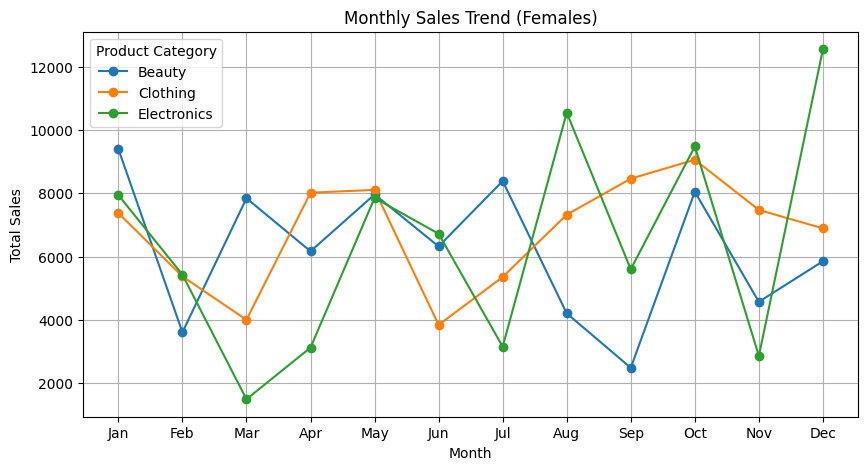

In [16]:
monthly_sales.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Monthly Sales Trend (Females)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Product Category')
plt.grid()
plt.show()

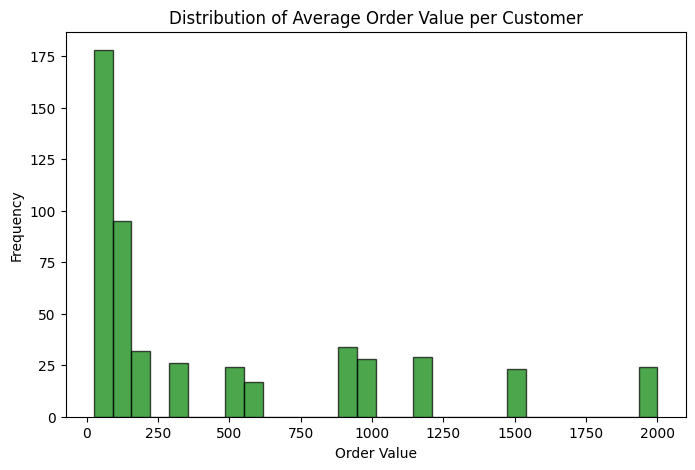

In [21]:
# Calculate average order value per customer
avg_order_value = df.groupby('Customer ID')['Total Amount'].mean()

plt.figure(figsize=(8, 5))
plt.hist(avg_order_value, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()